<a href="https://colab.research.google.com/github/Unoaccaso/lab_projects/blob/master/interferometro_michelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importazione dei dati
Si importa il dataset e si definiscono le funzioni che saranno successivamente utili all'analisi dati.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as cost

In [0]:
# funzione che calcola la visibilità su un vettore di intensità.
def V(I = None):
  I_max = I.max()
  I_min = I.min()
  V = (I_max - I_min)/(I_max + I_min)
  return V

# funzione per il plot della visibilità in tau.
def plot(y, x, fig_size = (10, 10), title=None, xlabel=None,
         ylabel=None):
  plt.figure(figsize = fig_size)
  plt.plot(x, y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  plt.close()

# ====================
# Funzione per il fit 
# ====================
import scipy.odr as odr
from scipy.stats import kstest

''' Performs the fit
Needed Parameters (key-word):
  function: function with 2 arguments:
    array-like object for parameters (float-like)
    array-like object for variables (float-like)
  par0: array-like object for parameters prior (float-like)
  par_names: array-like object for parameters prior (string)
  file_name: csv with data
Returns:
  tuple with array of parameters and pvalue
'''
def fit(function=None, par0=None, par_names=None,
        x=None, y=None, sx=None, sy=None,
        xlabel="", ylabel="", title="", xres = 100):

  fit_data = odr.RealData(x, y=y, sx=sx, sy=sy)
  model = odr.Model(function)
  fit = odr.ODR(fit_data, 
                model, 
                beta0=par0)
  out = fit.run()

  par = out.beta
  par_s = out.sd_beta
  for i in range(len(par_names)):
    print(f'{par_names[i]} : {par[i]:.3f} +- {par_s[i]:.3f}')

  plt.errorbar(x, y, xerr=sx, yerr=sy,
    ecolor='black', fmt='o', color='black', markersize=2
  )
  d_x = max(x)-min(x)
  x = np.linspace(min(x)-d_x/10, max(x)+d_x/10, xres)
  d_y = max(y)-min(y)
  plt.ylim(min(y)-d_y/10, max(y)+d_y/10)
  plt.plot(x, function(par, x), color='blue')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  '''
  Kolmogorov-smirnov test on normalized residuals is performed.
  It tests the similarity between normalized residuals and a normalized gaussian.
  This similarity implies a reasonable belief in goodness of fit and
  correct estimation of uncertainties.
  If pvalue is > 0.05 the fit is accepted
  '''
  y_res_norm = out.eps/sy
  plt.hist(y_res_norm)
  plt.title("Residuals histogram")
  plt.show()
  pvalue = kstest(y_res_norm, 'norm').pvalue
  print(f"p_value: {pvalue:.3f}")

  return out

Si organizzano i dati in maniera più consona, utilizzando pandas, in modo da rendere più comoda la rappresentazione.

In [3]:
path = 'Dati_Michelson-v2.csv'
columns = [
           
]
# inserisco i dati in un dataset pandas.
try:
  data = pd.read_csv(path, header= 0, sep=';')
except:
  print("Errore nell'apertura del file dati")
#data = data.drop([2])
data['l'] = data['l']*2/29.98
data['dl'] = data['dl']*2/29.98
data = data.rename(columns = {'l':'tempo [ns]',
             'dl': 'sigma[t] [ns]',
             'V': 'Visibilità',
             'DV': 'sigma[V]'
})
data

,tempo [ns],Unnamed: 1,sigma[t] [ns],Unnamed: 3,Vmax (mV),DVmax (mV),Vmin (mV),DVmin (mV),Visibilità,sigma[V]
0,-0.340227,-0.342282,0.006671,0.003356,77.2,3.3,9.0,1.3,0.791183,0.028171
1,-0.166778,-0.167785,0.006671,0.003356,113.4,4.4,7.4,1.2,0.877483,0.019177
2,0.000007,0.000010,0.006671,0.003356,79.4,3.4,0.2,1.0,0.994975,0.025063
3,0.166778,0.167785,0.006671,0.003356,59.4,2.8,2.7,1.1,0.913043,0.034113
4,0.333556,0.335570,0.006671,0.003356,87.4,3.6,8.2,1.2,0.828452,0.023843
5,0.500334,0.503356,0.006671,0.003356,87.4,3.6,13.0,1.4,0.741036,0.025993
6,0.567045,0.570470,0.006671,0.003356,82.4,3.5,18.2,1.5,0.638171,0.027479
7,0.667111,0.671141,0.006671,0.003356,70.6,3.1,21.0,1.6,0.541485,0.031077
8,0.833889,0.838926,0.006671,0.003356,61.0,2.8,25.0,1.8,0.418605,0.035212
9,0.900600,0.906040,0.006671,0.003356,69.4,3.1,34.2,2.0,0.339768,0.032546


Per calcolare la visibilità si avrà bisogno di mettere a confronto il minimo ed il massimo dell'intensità, si crea quindi una funzione dedita a tale compito.

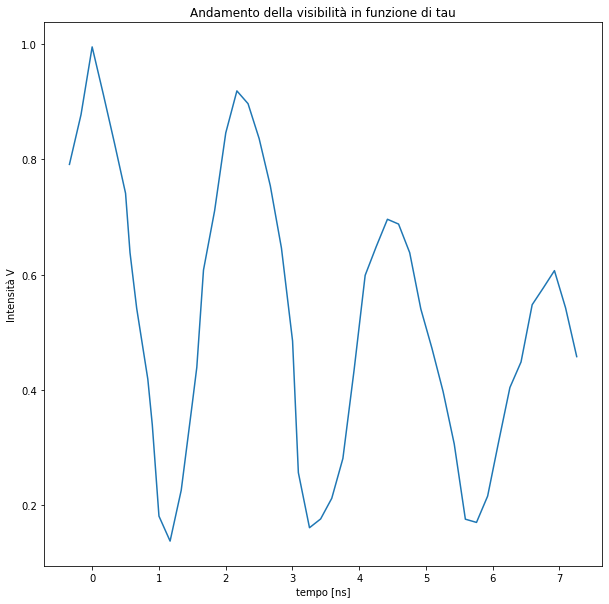

In [4]:
plot(data['Visibilità'], data['tempo [ns]'], title='Andamento della visibilità in funzione di tau',
     ylabel = 'Intensità V', xlabel = 'tempo [ns]')

Si definisce quindi una funzione che restituisca in output l'espressione di $|\gamma(\tau)|$ e si fittano i dati relativi alla visibilità in funzione del tempo tramite la suddetta funzione. <br/>
Si vuole mettere in evidenza come, data la complessità della funzione di fit, sia necessario fornire una prior per l'inferenza dei parametri del fit, onde evitare di giungere a convergenza in minimi locali.

sigma : 0.148 +- 0.010
N : 2.000 +- 0.001
Domega : 2.747 +- 0.011


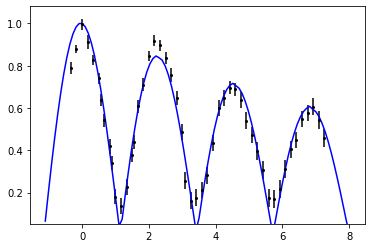

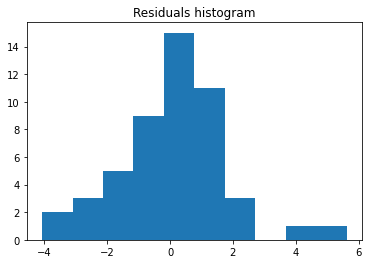

p_value: 0.209


In [5]:
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    y = np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
    par0 = [0.16, 2, 2.7], par_names=['sigma', 'N', 'Domega'], xres=100)

Appreso grazie al p-value la bontà del fit, si procede con l'estrarre dai parametri ottenuti le grandezze di interesse. Si vuole in particolare conoscere la lunghezza della cavità, il tempo di coerenza e il tempo caratteristico (ovvero il tempo necessario affinché la visibilità si riduca di $\frac{1}{2e}$).

In [6]:
  par = fitted.beta
  par_s = fitted.sd_beta
  tau = 2/par[0]
  stau = par_s[0]/(par[0]*par[0])
  print(f'tau value: ({tau : .1f} +- {stau: .1f})ns')

tau value: ( 13.5 +-  0.4)ns


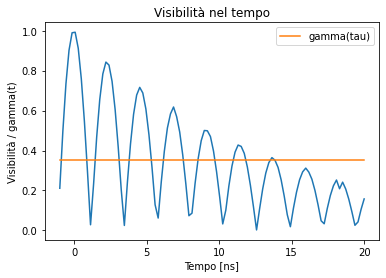

In [7]:
x = np.linspace(-1, 20, 100)
plt.plot(x, rs(par, x))
plt.plot(x, [rs(par, tau)]*len(x), label = 'gamma(tau)')
plt.title('Visibilità nel tempo')
plt.xlabel('Tempo [ns]')
plt.ylabel('Visibilità / gamma(t)')
plt.legend()

In [8]:
# lunghezza della cavità
L = cost.pi*cost.c/(par[2]*1e9)
sL = cost.pi*cost.c*par_s[2]*1e9/(par[2]*1e9)**2
print(f'Lunghezza della cavità del laser: ({L:.3f} +- {sL:.3f})m')

Lunghezza della cavità del laser: (0.343 +- 0.001)m


Si prova dunque a fornire come prior un valore indicativo dei modi pari a 3 e al fine di cercare di comprendere se esso possa rappresentare una stima coerente.

sigma : 0.080 +- 0.031
N : 2.998 +- 0.004
Domega : 2.750 +- 0.019


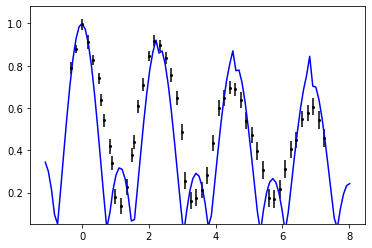

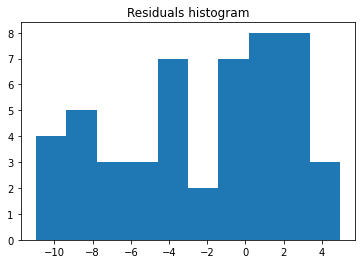

p_value: 0.000


In [9]:
#verifica dell'ipotesi dei 3 modi
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    y = np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
    par0 = [0.16, 3, 2.76], par_names=['sigma', 'N', 'Domega'])

# Test della differenza delle visibilità

sigma : 0.129 +- 0.012
N : 2.000 +- 0.000
Domega : 2.746 +- 0.011
alpha : 0.961 +- 0.017


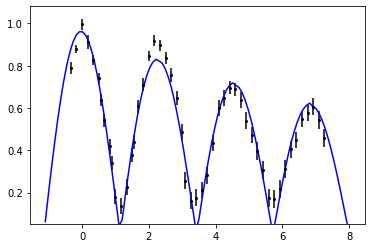

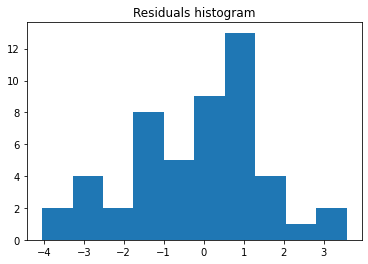

p_value: 0.041
new tau value : (15.4 +- 0.7)ns


In [42]:
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    alpha = par[3]
    y = alpha*np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    #y = np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    #y = alpha*(1-t/2*sigma)*1/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
    par0 = [0.15, 2, 2.5, 50], 
    par_names=['sigma', 'N', 'Domega', 'alpha'], xres=100)

par = fitted.beta
par_s = fitted.sd_beta
tau = 2/par[0]
stau = par_s[0]/(par[0]*par[0])
print(f'new tau value : ({tau:.1f} +- {stau:.1f})ns')